Dear xxxxxxxx,

We are thrilled to welcome you as a Data Analyst for Gnoosic!

As you know, we are trying to come up with ways to enhance our music recommendations. One of the new features we'd like to research is to recommend songs (not only bands). We're also aware of the limitations of our collaborative filtering algorithms, and would like to give users two new possibilities when searching for recommendations:

- Songs that are actually similar to the ones they picked from an acoustic point of view.
- Songs that are popular around the world right now, independently from their tastes.

Coming up with the perfect song recommender will take us months - no need to stress out too much. In this first week, we want you to explore new data sources for songs. The internet is full of information and our first step is to acquire it do an initial exploration. Feel free to use APIs or directly scrape the web to collect as much information as possible from popular songs. Eventually, we'll need to collect data from millions of songs, but we can start with a few hundreds or thousands from each source and see if the collected features are useful. 

Once the data is collected, we want you to create clusters of songs that are similar to each other. The idea is that if a user inputs a song from one group, we'll prioritize giving them recommendations of songs from that same group.

On Friday, you will present your work to me and Marek, the CEO and founder. Full disclosure: I need you to be very convincing about this whole song-recommender, as this has been my personal push and the main reason we hired you for!

Be open minded about this process: we are agile, and that means that we define our products and features on-the-go, while exploring the tools and the data that's available to us. We'd love you to provide your own vision of the product and the next steps to be taken.

Lots of luck and strength for this first week with us!

Jane


## Lab | Web Scraping Single Page (GNOD part 1)
Business goal:
Check the case_study_gnod.md file.

Make sure you've understood the big picture of your project:

the goal of the company (Gnod),
their current product (Gnoosic),
their strategy, and
how your project fits into this context.
Re-read the business case and the e-mail from the CTO.

Instructions - Scraping popular songs
Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will also enjoy a recommendation of another song that is popular at the moment.

You have to find data on the internet about currently popular songs. Popvortex maintains a weekly Top 100 of "hot" songs here: http://www.popvortex.com/music/charts/top-100-songs.php.

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [66]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


In [67]:
url = "http://www.popvortex.com/music/charts/top-100-songs.php"

In [68]:
response = requests.get(url)

In [69]:
response.status_code

200

In [70]:
soup = BeautifulSoup(response.content, "html.parser")

In [100]:
#soup

In [72]:
soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8 > p')

[<p class="title-artist"><cite class="title">TEXAS HOLD 'EM</cite><em class="artist">Beyoncé</em></p>]

In [73]:
soup.select('#chart-position-1 > div.chart-content.col-xs-12.col-sm-8')

[<div class="chart-content col-xs-12 col-sm-8"><p class="title-artist"><cite class="title">TEXAS HOLD 'EM</cite><em class="artist">Beyoncé</em></p><ul><li><strong>Genre</strong>: <a href="/music/charts/top-country-songs.php">Country</a></li><li><strong>Release Date</strong>: February 11, 2024</li></ul><a class="buy-button button" href="https://music.apple.com/us/album/texas-hold-em/1730408497?i=1730408498&amp;uo=2&amp;partnerId=11&amp;at=10l4UI&amp;itsct=music_box_link&amp;itscg=30200&amp;ls=1&amp;ct=music-songs&amp;app=music" rel="nofollow noopener">Apple Music / iTunes</a> <a aria-label="Buy TEXAS HOLD 'EM - Beyoncé on Amazon" class="amazon-buy button" href="https://www.amazon.com/gp/search?ie=UTF8&amp;keywords=TEXAS+HOLD+%27EM+Beyonc%C3%A9&amp;tag=popv0f-20&amp;search-alias=digital-music" rel="nofollow noopener" target="_blank">Buy on Amazon</a> <div class="social-share"><a class="facebook-share-button" href="javascript: void(0)" onclick="window.open('https://www.facebook.com/dialog

In [75]:
top100 = soup.find_all('div', class_='chart-content')
genre = element.find('ul').find('li').text.strip()

In [101]:
#top100

In [62]:
title = []
artist = []
genre = []
#chart-position-23 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(2)
#chart-position-24 > div.chart-content.col-xs-12.col-sm-8 > ul > li:nth-child(1) > a

for i, element in enumerate(top100):
        title = element.find('cite', class_='title').text.strip()
        artist = element.find('em', class_='artist').text.strip()
#         genre = element.find('ul').find('li').text.strip()
        
        genre = "Genre not found"
        ul_tag = element.find('ul')
        if ul_tag:
            for li_tag in ul_tag.find_all('li'):
                if 'Genre' in li_tag.text:
                    genre = li_tag.text.strip().replace('Genre:', '')
      
        print(f"{i + 1}. {title} - {artist} - {genre}")

1. TEXAS HOLD 'EM - Beyoncé -  Country
2. Lose Control - Teddy Swims -  Pop
3. Beautiful Things - Benson Boone -  Pop
4. Flowers - Miley Cyrus -  Pop
5. Turn the Lights Back On - Billy Joel -  Pop
6. Don't Let the Old Man In - Toby Keith -  Country
7. Lovin On Me - Jack Harlow -  Hip-Hop / Rap
8. TEXAS HOLD 'EM - Beyoncé -  Country
9. Fast Car - Tracy Chapman -  Singer/Songwriter
10. Sorrys & Ferraris - Polo G -  Rap
11. Training Season - Dua Lipa -  Pop
12. 16 CARRIAGES - Beyoncé -  Country
13. Fast Car - Luke Combs -  Country
14. Selfish - Justin Timberlake -  Pop
15. I Remember Everything (feat. Kacey Musgraves) - Zach Bryan -  Country
16. yes, and? - Ariana Grande & Mariah Carey -  Pop
17. Houdini - Dua Lipa -  Pop
18. Yeah! (feat. Lil Jon & Ludacris) - USHER -  R&B / Soul
19. Save Me - Jelly Roll -  Rap
20. Made For Me - Muni Long -  R&B / Soul
21. Lil Boo Thang - Paul Russell -  Pop
22. Cruel Summer - Taylor Swift -  Pop
23. Country's Cool Again - Lainey Wilson -  Country
24. Liv

In [65]:

data = []
for i, element in enumerate(top100):
    title = element.find('cite', class_='title').text.strip()
    artist = element.find('em', class_='artist').text.strip()

    # Extracting genre
    genre = "Genre not found"
    ul_tag = element.find('ul')
    if ul_tag:
        for li_tag in ul_tag.find_all('li'):
            if 'Genre' in li_tag.text:
                genre = li_tag.text.strip().replace('Genre:', '')
                
# # Extracting release date using regular expression
#     release_date_text = ""
#     release_date_match = re.search(r'Release Date: (\w+ \d{1,2}, \d{4})', element.get_text())
#     if release_date_match:
#         release_date_text = release_date_match.group(1)
        
#         # Convert release date to date format
#         release_date = datetime.strptime(release_date_text, "%B %d, %Y").strftime("%d/%m/%Y")

    data.append([title, artist, genre])

df = pd.DataFrame(data, columns=['title', 'artist', 'genre'])
print(df.shape)
df.head()

(100, 3)


,title,artist,genre
0,TEXAS HOLD 'EM,Beyoncé,Country
1,Lose Control,Teddy Swims,Pop
2,Beautiful Things,Benson Boone,Pop
3,Flowers,Miley Cyrus,Pop
4,Turn the Lights Back On,Billy Joel,Pop


## GNOD part 2

In [ ]:
# Input title
    # if the title in df => give a new song from this df
    # if the title NOT in df => "sorry I don't have a recommandation"

In [79]:
def recommend_song(df, input_song):
    # Convert input to lowercase 
    input_song = input_song.lower()
    
    # Check if the input song is in the DataFrame
    if input_song in df['title'].str.lower().values:
        # Get a random song that is not the input song
        random_song = df[df['title'].str.lower() != input_song].sample(n=1)
        recommended_song = random_song.iloc[0]['title']
        recommended_artist = random_song.iloc[0]['artist']
        print(f"Our recommendation is {recommended_song} by {recommended_artist}.")
    else:
        print("Sorry we do not have recommendation at the moment")

In [ ]:
user_input = input("Enter a song title: ")
recommend_song(df, user_input)

## GNOD part 3

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas import json_normalize

In [2]:
secrets_file = open("secrets","r")
string = secrets_file.read()

In [3]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        #print(line.split(':'))
        secrets_dict[line.split(':')[0]]=line.split(':')[1].strip()

In [4]:
# autentification

In [46]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['Clientid'],
                                                           client_secret=secrets_dict['Clientsecret']))

In [7]:
playlist = sp.user_playlist_tracks("spotify", "1TM3rECdFTc0R0tgiIf0oW")

In [8]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3000)/1000) # respectful nap
    return tracks

In [9]:
all_tracks = get_playlist_tracks("1TM3rECdFTc0R0tgiIf0oW")
len(all_tracks)

4690

In [11]:
songs = json_normalize(all_tracks)

In [13]:
#songs

In [15]:
import pandas as pd

In [17]:
artists_df = pd.DataFrame(columns=['href', 'id', 'name', 'type', 'uri', 'external_urls.spotify','song_id', 'song_name', 'popularity' ])
for i in songs.index:
    artists_for_song = json_normalize(songs.iloc[i]['track.artists'])
    artists_for_song['song_id']    = songs.iloc[i]['track.id']         # we want to keep song_id, it is the same for all artists
    artists_for_song['song_name']  = songs.iloc[i]['track.name']       # we want to keep song_name, it is the sae for all artists
    artists_for_song['popularity'] = songs.iloc[i]['track.popularity'] # same for popularity   
    artists_df = pd.concat([artists_df, artists_for_song], axis=0)

In [18]:
df_final = artists_df[['song_name', 'name', 'song_id', 'popularity']]
df_final

,song_name,name,song_id,popularity
0,Pretty Pimpin,Kurt Vile,3l9eg9RtisizG12a1D6nZl,0
0,I Need My Girl,The National,50M7nY1oQuNHecs0ahWAtI,68
0,Strange,Galaxie 500,2TTAPkrGQQOZkaUTUlt21Q,48
0,Todeswalzer,Windir,7BvcpEdO7PUDGGSER1S9LA,36
0,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,93
...,...,...,...,...
1,Apologize,OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,75
0,Goddamn Lonely Love - Remastered,Drive-By Truckers,241LK9hqfXJyWpQ7oClQSN,48
0,Graveless yet Dead,Convocation,6hF9etLMoADWLsoui5ejGW,19
0,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,3vkQ5DAB1qQMYO4Mr9zJN6,84


In [31]:
list_id = df_final['song_id'][0:5]

In [35]:
list_id

0    3l9eg9RtisizG12a1D6nZl
0    50M7nY1oQuNHecs0ahWAtI
0    2TTAPkrGQQOZkaUTUlt21Q
0    7BvcpEdO7PUDGGSER1S9LA
0    0VjIjW4GlUZAMYd2vXMi3b
Name: song_id, dtype: object

In [70]:
#sp.audio_features(list_id)

In [44]:
chunks = [(i, i+100) for i in range(0, len(df_final), 100)]
#chunks

In [49]:
chunks[0:2]

[(0, 100), (100, 200)]

In [55]:
df_final.isna().sum()

song_name     0
name          0
song_id       1
popularity    0
dtype: int64

In [54]:
df_final[df_final['song_id'].isna()]

,song_name,name,song_id,popularity
0,Restless,40 Watt Sun,None,0


In [56]:
df_final=df_final.dropna()

In [57]:
df_final.isna().sum()

song_name     0
name          0
song_id       0
popularity    0
dtype: int64

In [58]:
chunks = [(i, i+100) for i in range(0, len(df_final), 100)]

audio_features_list = []
for chunk in chunks:
    id_list100 = df_final['song_id'][chunk[0]:chunk[1]]
    audio_features_list = audio_features_list + sp.audio_features(id_list100)
    sleep(randint(1,3000)/1000)
len(audio_features_list)

4953

In [62]:
#audio_features_list

In [60]:
audio_features_df = json_normalize(audio_features_list)

In [66]:
audio_features_df.drop_duplicates(inplace=True)

In [67]:
audio_features_df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.566,0.664,8,-9.081,1,0.0281,0.092800,0.305000,0.0903,0.764,91.117,audio_features,3l9eg9RtisizG12a1D6nZl,spotify:track:3l9eg9RtisizG12a1D6nZl,https://api.spotify.com/v1/tracks/3l9eg9Rtisiz...,https://api.spotify.com/v1/audio-analysis/3l9e...,298760,4
1,0.520,0.436,0,-11.508,0,0.0355,0.865000,0.065100,0.1230,0.114,126.053,audio_features,50M7nY1oQuNHecs0ahWAtI,spotify:track:50M7nY1oQuNHecs0ahWAtI,https://api.spotify.com/v1/tracks/50M7nY1oQuNH...,https://api.spotify.com/v1/audio-analysis/50M7...,245240,4
2,0.312,0.844,7,-7.085,1,0.0511,0.079800,0.023100,0.0793,0.626,97.039,audio_features,2TTAPkrGQQOZkaUTUlt21Q,spotify:track:2TTAPkrGQQOZkaUTUlt21Q,https://api.spotify.com/v1/tracks/2TTAPkrGQQOZ...,https://api.spotify.com/v1/audio-analysis/2TTA...,199467,4
3,0.236,0.870,2,-4.747,0,0.0579,0.000011,0.930000,0.3050,0.186,167.845,audio_features,7BvcpEdO7PUDGGSER1S9LA,spotify:track:7BvcpEdO7PUDGGSER1S9LA,https://api.spotify.com/v1/tracks/7BvcpEdO7PUD...,https://api.spotify.com/v1/audio-analysis/7Bvc...,295131,4
4,0.514,0.730,1,-5.934,1,0.0598,0.001460,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4


In [69]:
df_audio_features = pd.merge(left=df_final,
                        right=audio_features_df,
                        how='inner',
                        left_on='song_id',
                        right_on='id')
df_audio_features

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Pretty Pimpin,Kurt Vile,3l9eg9RtisizG12a1D6nZl,0,0.566,0.664,8,-9.081,1,0.0281,...,0.0903,0.764,91.117,audio_features,3l9eg9RtisizG12a1D6nZl,spotify:track:3l9eg9RtisizG12a1D6nZl,https://api.spotify.com/v1/tracks/3l9eg9Rtisiz...,https://api.spotify.com/v1/audio-analysis/3l9e...,298760,4
1,I Need My Girl,The National,50M7nY1oQuNHecs0ahWAtI,68,0.520,0.436,0,-11.508,0,0.0355,...,0.1230,0.114,126.053,audio_features,50M7nY1oQuNHecs0ahWAtI,spotify:track:50M7nY1oQuNHecs0ahWAtI,https://api.spotify.com/v1/tracks/50M7nY1oQuNH...,https://api.spotify.com/v1/audio-analysis/50M7...,245240,4
2,Strange,Galaxie 500,2TTAPkrGQQOZkaUTUlt21Q,48,0.312,0.844,7,-7.085,1,0.0511,...,0.0793,0.626,97.039,audio_features,2TTAPkrGQQOZkaUTUlt21Q,spotify:track:2TTAPkrGQQOZkaUTUlt21Q,https://api.spotify.com/v1/tracks/2TTAPkrGQQOZ...,https://api.spotify.com/v1/audio-analysis/2TTA...,199467,4
3,Todeswalzer,Windir,7BvcpEdO7PUDGGSER1S9LA,36,0.236,0.870,2,-4.747,0,0.0579,...,0.3050,0.186,167.845,audio_features,7BvcpEdO7PUDGGSER1S9LA,spotify:track:7BvcpEdO7PUDGGSER1S9LA,https://api.spotify.com/v1/tracks/7BvcpEdO7PUD...,https://api.spotify.com/v1/audio-analysis/7Bvc...,295131,4
4,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,...,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,Apologize,OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,75,0.653,0.604,8,-6.017,1,0.0278,...,0.0970,0.101,118.016,audio_features,6ucR4KfvsBFWCMVFDvyKKl,spotify:track:6ucR4KfvsBFWCMVFDvyKKl,https://api.spotify.com/v1/tracks/6ucR4KfvsBFW...,https://api.spotify.com/v1/audio-analysis/6ucR...,184400,4
4949,Goddamn Lonely Love - Remastered,Drive-By Truckers,241LK9hqfXJyWpQ7oClQSN,48,0.427,0.541,7,-7.042,1,0.0294,...,0.2230,0.153,119.094,audio_features,241LK9hqfXJyWpQ7oClQSN,spotify:track:241LK9hqfXJyWpQ7oClQSN,https://api.spotify.com/v1/tracks/241LK9hqfXJy...,https://api.spotify.com/v1/audio-analysis/241L...,301720,4
4950,Graveless yet Dead,Convocation,6hF9etLMoADWLsoui5ejGW,19,0.262,0.689,2,-8.342,1,0.0705,...,0.1170,0.178,130.110,audio_features,6hF9etLMoADWLsoui5ejGW,spotify:track:6hF9etLMoADWLsoui5ejGW,https://api.spotify.com/v1/tracks/6hF9etLMoADW...,https://api.spotify.com/v1/audio-analysis/6hF9...,572149,4
4951,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,3vkQ5DAB1qQMYO4Mr9zJN6,84,0.749,0.491,10,-9.655,1,0.0403,...,0.1590,0.536,119.528,audio_features,3vkQ5DAB1qQMYO4Mr9zJN6,spotify:track:3vkQ5DAB1qQMYO4Mr9zJN6,https://api.spotify.com/v1/tracks/3vkQ5DAB1qQM...,https://api.spotify.com/v1/audio-analysis/3vkQ...,292613,4


## GNOD Part 4

In [71]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [102]:
df_audio_features['popularity'] = df_audio_features['popularity'].astype(int)

In [103]:
df_audio_features.dtypes

song_name            object
name                 object
song_id              object
popularity            int32
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [104]:
X_num = df_audio_features.select_dtypes('number')

In [105]:
X_prep = StandardScaler().fit_transform(X_num)
pd.DataFrame(X_prep,columns=X_num.columns).head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-1.171729,0.733987,-0.398752,0.751737,-0.404737,0.729068,-0.796695,-0.208804,0.213107,-0.762843,1.344064,-1.166039,0.240063,0.233789
1,1.406374,0.491138,-1.398067,-1.513938,-1.074227,-1.371615,-0.687783,2.811565,-0.501272,-0.565416,-1.114800,0.029047,-0.159999,0.233789
2,0.648108,-0.606961,0.390181,0.468528,0.145862,0.729068,-0.458186,-0.259652,-0.626340,-0.829256,0.822028,-0.963460,-0.502152,0.233789
3,0.193149,-1.008189,0.504138,-0.947520,0.790802,-1.371615,-0.358105,-0.571739,2.074245,0.533415,-0.842434,1.458663,0.212937,0.233789
4,2.354206,0.459463,-0.109477,-1.230729,0.463367,0.729068,-0.330141,-0.566070,-0.694844,-0.766465,-0.282569,1.566759,-0.497869,0.233789


In [135]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(X_prep)

C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=1234)

In [136]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    1292
1    1447
2     261
3     649
4     287
5    1017
Name: count, dtype: int64

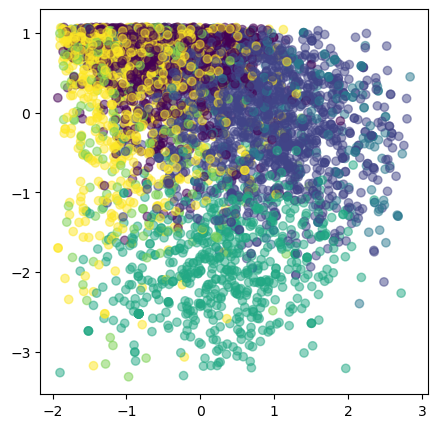

In [149]:
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 1], X_prep[:, 2], c=clusters,alpha=0.5)
plt.show()

In [134]:
kmeans.inertia_ 

40613.56637627404

In [96]:
# choosing k

C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

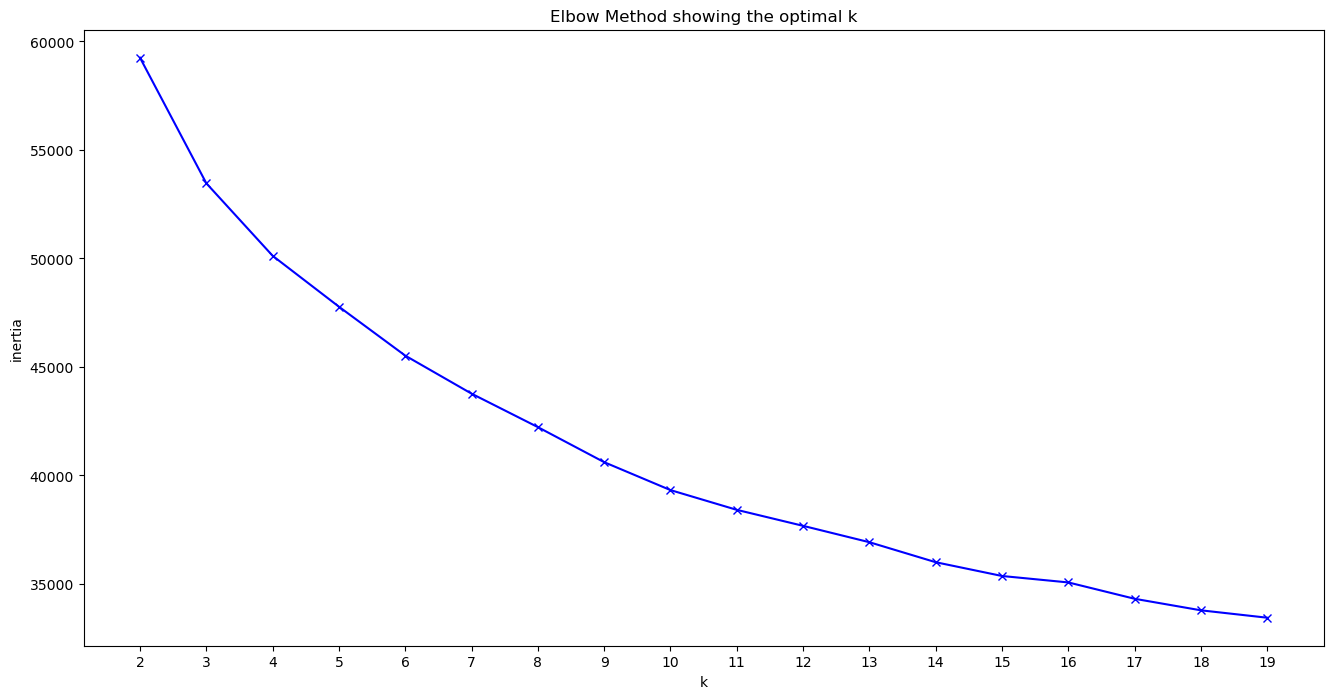

In [110]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tella\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0.5, 1.0, 'Silhouette score showing the optimal k')

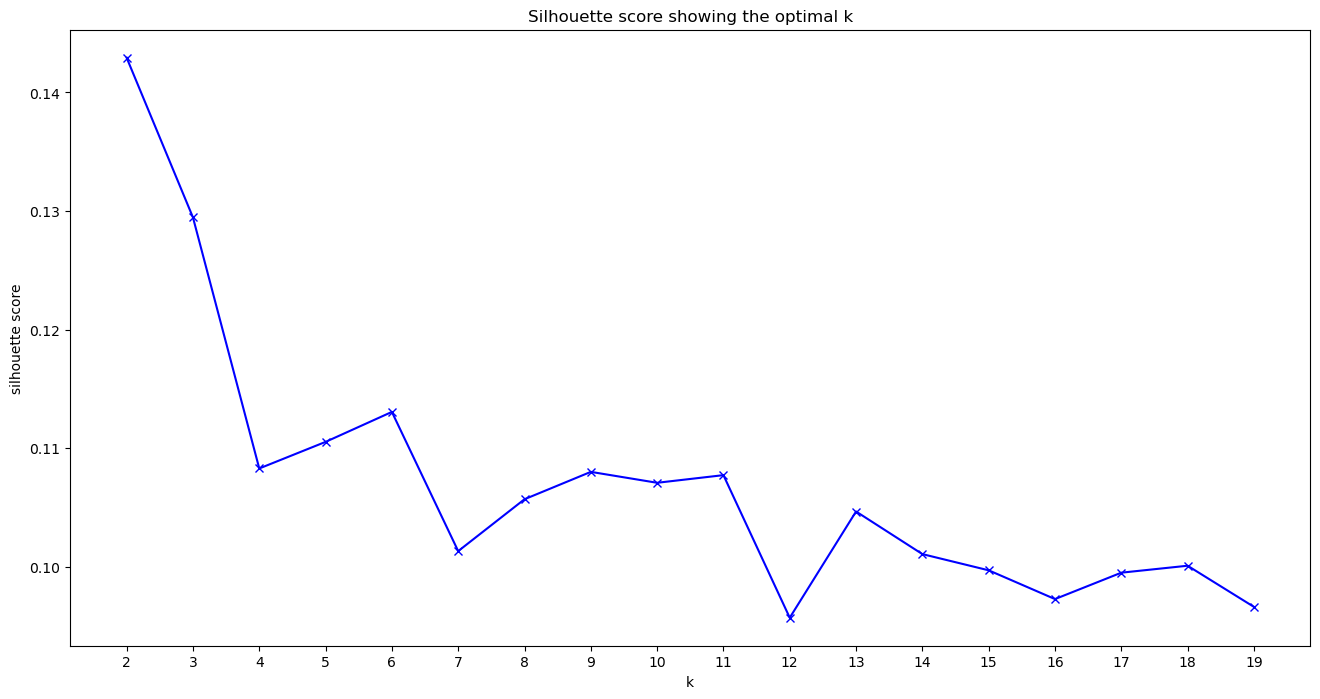

In [111]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette score showing the optimal k')

In [130]:
%%time
kmeans = KMeans(n_clusters=6,
                init="random",
                n_init= 30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)
print(kmeans.inertia_)

45963.921520782904
CPU times: total: 11.5 s
Wall time: 7.1 s


In [ ]:
# join the clusters to the df

In [151]:
df_clusters = pd.DataFrame(clusters, columns=['clusters'])
df_clusters
#df_audio_features['clusters'] 

,clusters
0,1
1,3
2,1
3,5
4,1
...,...
4948,1
4949,1
4950,5
4951,1


In [154]:
df_audio_ft_cl = pd.concat([df_audio_features, df_clusters], axis=1)

In [155]:
df_audio_ft_cl

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,Pretty Pimpin,Kurt Vile,3l9eg9RtisizG12a1D6nZl,0,0.566,0.664,8,-9.081,1,0.0281,...,0.764,91.117,audio_features,3l9eg9RtisizG12a1D6nZl,spotify:track:3l9eg9RtisizG12a1D6nZl,https://api.spotify.com/v1/tracks/3l9eg9Rtisiz...,https://api.spotify.com/v1/audio-analysis/3l9e...,298760,4,1
1,I Need My Girl,The National,50M7nY1oQuNHecs0ahWAtI,68,0.520,0.436,0,-11.508,0,0.0355,...,0.114,126.053,audio_features,50M7nY1oQuNHecs0ahWAtI,spotify:track:50M7nY1oQuNHecs0ahWAtI,https://api.spotify.com/v1/tracks/50M7nY1oQuNH...,https://api.spotify.com/v1/audio-analysis/50M7...,245240,4,3
2,Strange,Galaxie 500,2TTAPkrGQQOZkaUTUlt21Q,48,0.312,0.844,7,-7.085,1,0.0511,...,0.626,97.039,audio_features,2TTAPkrGQQOZkaUTUlt21Q,spotify:track:2TTAPkrGQQOZkaUTUlt21Q,https://api.spotify.com/v1/tracks/2TTAPkrGQQOZ...,https://api.spotify.com/v1/audio-analysis/2TTA...,199467,4,1
3,Todeswalzer,Windir,7BvcpEdO7PUDGGSER1S9LA,36,0.236,0.870,2,-4.747,0,0.0579,...,0.186,167.845,audio_features,7BvcpEdO7PUDGGSER1S9LA,spotify:track:7BvcpEdO7PUDGGSER1S9LA,https://api.spotify.com/v1/tracks/7BvcpEdO7PUD...,https://api.spotify.com/v1/audio-analysis/7Bvc...,295131,4,5
4,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,...,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,Apologize,OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,75,0.653,0.604,8,-6.017,1,0.0278,...,0.101,118.016,audio_features,6ucR4KfvsBFWCMVFDvyKKl,spotify:track:6ucR4KfvsBFWCMVFDvyKKl,https://api.spotify.com/v1/tracks/6ucR4KfvsBFW...,https://api.spotify.com/v1/audio-analysis/6ucR...,184400,4,1
4949,Goddamn Lonely Love - Remastered,Drive-By Truckers,241LK9hqfXJyWpQ7oClQSN,48,0.427,0.541,7,-7.042,1,0.0294,...,0.153,119.094,audio_features,241LK9hqfXJyWpQ7oClQSN,spotify:track:241LK9hqfXJyWpQ7oClQSN,https://api.spotify.com/v1/tracks/241LK9hqfXJy...,https://api.spotify.com/v1/audio-analysis/241L...,301720,4,1
4950,Graveless yet Dead,Convocation,6hF9etLMoADWLsoui5ejGW,19,0.262,0.689,2,-8.342,1,0.0705,...,0.178,130.110,audio_features,6hF9etLMoADWLsoui5ejGW,spotify:track:6hF9etLMoADWLsoui5ejGW,https://api.spotify.com/v1/tracks/6hF9etLMoADW...,https://api.spotify.com/v1/audio-analysis/6hF9...,572149,4,5
4951,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,3vkQ5DAB1qQMYO4Mr9zJN6,84,0.749,0.491,10,-9.655,1,0.0403,...,0.536,119.528,audio_features,3vkQ5DAB1qQMYO4Mr9zJN6,spotify:track:3vkQ5DAB1qQMYO4Mr9zJN6,https://api.spotify.com/v1/tracks/3vkQ5DAB1qQM...,https://api.spotify.com/v1/audio-analysis/3vkQ...,292613,4,1


In [157]:
df_audio_ft_cl = df_audio_ft_cl.drop(['type', 'id'], axis=1)
#id and song_id are identical
#type=audio_features => irrelevant

In [158]:
df_audio_ft_cl

,song_name,name,song_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,instrumentalness,liveness,valence,tempo,uri,track_href,analysis_url,duration_ms,time_signature,clusters
0,Pretty Pimpin,Kurt Vile,3l9eg9RtisizG12a1D6nZl,0,0.566,0.664,8,-9.081,1,0.0281,...,0.305000,0.0903,0.764,91.117,spotify:track:3l9eg9RtisizG12a1D6nZl,https://api.spotify.com/v1/tracks/3l9eg9Rtisiz...,https://api.spotify.com/v1/audio-analysis/3l9e...,298760,4,1
1,I Need My Girl,The National,50M7nY1oQuNHecs0ahWAtI,68,0.520,0.436,0,-11.508,0,0.0355,...,0.065100,0.1230,0.114,126.053,spotify:track:50M7nY1oQuNHecs0ahWAtI,https://api.spotify.com/v1/tracks/50M7nY1oQuNH...,https://api.spotify.com/v1/audio-analysis/50M7...,245240,4,3
2,Strange,Galaxie 500,2TTAPkrGQQOZkaUTUlt21Q,48,0.312,0.844,7,-7.085,1,0.0511,...,0.023100,0.0793,0.626,97.039,spotify:track:2TTAPkrGQQOZkaUTUlt21Q,https://api.spotify.com/v1/tracks/2TTAPkrGQQOZ...,https://api.spotify.com/v1/audio-analysis/2TTA...,199467,4,1
3,Todeswalzer,Windir,7BvcpEdO7PUDGGSER1S9LA,36,0.236,0.870,2,-4.747,0,0.0579,...,0.930000,0.3050,0.186,167.845,spotify:track:7BvcpEdO7PUDGGSER1S9LA,https://api.spotify.com/v1/tracks/7BvcpEdO7PUD...,https://api.spotify.com/v1/audio-analysis/7Bvc...,295131,4,5
4,Blinding Lights,The Weeknd,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,...,0.000095,0.0897,0.334,171.005,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4948,Apologize,OneRepublic,6ucR4KfvsBFWCMVFDvyKKl,75,0.653,0.604,8,-6.017,1,0.0278,...,0.000000,0.0970,0.101,118.016,spotify:track:6ucR4KfvsBFWCMVFDvyKKl,https://api.spotify.com/v1/tracks/6ucR4KfvsBFW...,https://api.spotify.com/v1/audio-analysis/6ucR...,184400,4,1
4949,Goddamn Lonely Love - Remastered,Drive-By Truckers,241LK9hqfXJyWpQ7oClQSN,48,0.427,0.541,7,-7.042,1,0.0294,...,0.004810,0.2230,0.153,119.094,spotify:track:241LK9hqfXJyWpQ7oClQSN,https://api.spotify.com/v1/tracks/241LK9hqfXJy...,https://api.spotify.com/v1/audio-analysis/241L...,301720,4,1
4950,Graveless yet Dead,Convocation,6hF9etLMoADWLsoui5ejGW,19,0.262,0.689,2,-8.342,1,0.0705,...,0.008330,0.1170,0.178,130.110,spotify:track:6hF9etLMoADWLsoui5ejGW,https://api.spotify.com/v1/tracks/6hF9etLMoADW...,https://api.spotify.com/v1/audio-analysis/6hF9...,572149,4,5
4951,Gimme! Gimme! Gimme! (A Man After Midnight),ABBA,3vkQ5DAB1qQMYO4Mr9zJN6,84,0.749,0.491,10,-9.655,1,0.0403,...,0.008990,0.1590,0.536,119.528,spotify:track:3vkQ5DAB1qQMYO4Mr9zJN6,https://api.spotify.com/v1/tracks/3vkQ5DAB1qQM...,https://api.spotify.com/v1/audio-analysis/3vkQ...,292613,4,1
